# A Comprehensive Introduction to Snowflake Snowpark

## What is Snowflake Snowpark?

Traditional machine learning involves bringing the data from databases to where the models are. With the recent boom of AI and the sheer size of today's datasets, this approach is becoming more and more impractical. 

Terabytes of data must be transferred from the database to client-side applications for cleaning, analysis, and model training. This seemingly innocent two-way trip wastes valuable company resources in several ways. First, moving massive amounts of data takes significant time. Second, additional staff are required to monitor the process for errors. Finally, these data transfers accumulate ongoing costs.

For this reason, more and more companies are choosing in-database technologies to minimize data movement and run data operations in a smooth manner. Currently, one of the best in-database technologies in the market is Snowpark offered by Snowflake Cloud.

Snowpark is a set of libraries and runtimes that allows you to securely run programming languages in Snowflake cloud to develop data pipelines, machine learning models and more. By completing this article, you will have a firm grasp of the fundamentals of Snowpark and how you can use it in your own projects.

## Prerequisites

This article assumes that you are already comfortable with SQL and Snowflake's computing platform to manage databases and run code. If you'd like to refresh important concepts, here are some short resources:
- [Comprehensive MySQL tutorial](https://www.datacamp.com/tutorial/my-sql-tutorial)
- [Introduction to Snowflake tutorial](https://www.datacamp.com/tutorial/introduction-to-snowflake-for-beginners)

If you are a total beginner, I recommend you go through some beginner and intermediate courses on SQL and Snowflake, which DataCamp already offers:
- [SQL Fundamentals skill track](https://www.datacamp.com/tracks/sql-fundamentals)
- [Introduction to Snowflake course](https://app.datacamp.com/learn/courses/introduction-to-snowflake)
- [Introduction to data modeling in Snowflake course](https://app.datacamp.com/learn/courses/introduction-to-data-modeling-in-snowflake)

Now, let's get started!

## Why learn Snowflake Snowpark?

Snowflake Snowpark is a set of libraries and runtimes that allows you to securely use programming languages like Python, Java, and Scala to process data directly within Snowflake's cloud platform. This eliminates the need to move data outside of Snowflake for processing, improving efficiency and security. Here are some of its key benefits:

- Process data in Snowflake: Write code in your preferred language to manipulate and analyze your SQL databases in Snowflake and execute it within Snowflake's secure environments. This eliminates the need to move data to another environment.
- Improved performance: By processing data directly within Snowflake, Snowpark can take advantage of the platform's elastic and serverless architecture for efficient processing.
- Reduced costs and technology overhead: Since resources are mostly provided by Snowflake, you don't have to manage separate platforms for compute and storage.
- Work with what you know and where you want: Snowpark's APIs allows you to connect to your SQL databases from any environment such as Jupyter or VSCode and build data pipelines and ML apps. The best part is that you can use your favorite libraries such as Pandas, Scikit-learn, XGBoost, etc. along with Snowpark frameworks.

So, in a sentence, Snowpark is powerful yet simple way for developers to build data pipelines, machine learning solutions and other data-driven applications directly within Snowflake Cloud.

And now, we are going to learn it.

## Getting started with Snowpark

The aim of the tutorial is to leave with a hyperparameter tuned model trained on a table of a Snowflake database using Snowpark. To do so, we will first take the following steps:

1. Create a virtual environment with relevant libraries.
2. Ingest sample data into Snowflake.
3. Creating a Snowpark session to connect to Snowflake.
4. Load the ingested data into the session.


### Setting up the environment

For this tutorial, we will be using a new `conda` environment:

```shell
$ conda create -n snowpark python==3.10 -y
$ conda activate snowpark
```

After activation, please install the following libraries:

```shell
$ pip install snowflake-snowpark-python  # The snowpark API
$ pip install pandas pyarrow numpy matplotlib seaborn
```

If you will be using Jupyter, also install `ipykernel` and run the following command so that the environment we are using is added as a Jupyter kernel:

```shell
$ pip install ipykernel
$ ipython kernel install --user --name=snowpark
```

Let's import some general libraries we will need along the way:

In [114]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

We will import functions and methods related to Snowpark when we need them so that there is no confusion as to when they were imported. 

### Ingesting data into Snowflake

The dataset we will use for this tutorial will be [The Diamonds Dataset from Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds) (just like my other tutorials). You can directly download it as a file from my GitHub by clicking [this link](https://raw.githubusercontent.com/BexTuychiev/medium_stories/master/2024/4_april/3_snowflake_snowpark/diamonds.csv).

Once you have it, log in to your Snowflake account at [app.snowflake.com](app.snowflake.com). Then, follow the GIF below to ingest the dataset into a new database table:

![](images/web_create_table.gif)

In practice, you will rarely import CSV files as tables into your Snowflake databases. Most of the time, you will be working with existing databases with different access levels granted to you by database administrators at your company. 

So, as long as you have query and write privileges for your database, you can follow along this tutorial.

### Creating a session with Snowpark

Now, we have to establish a connection between Snowpark API and Snowflake cloud so that we can hook up to our database. This connection requires the following Snowflake credentials:
- Account name
- Username
- Snowflake password

In the image below, I show how to retrieve the above info from your [Snowflake dashboard](app.snowflake.com):

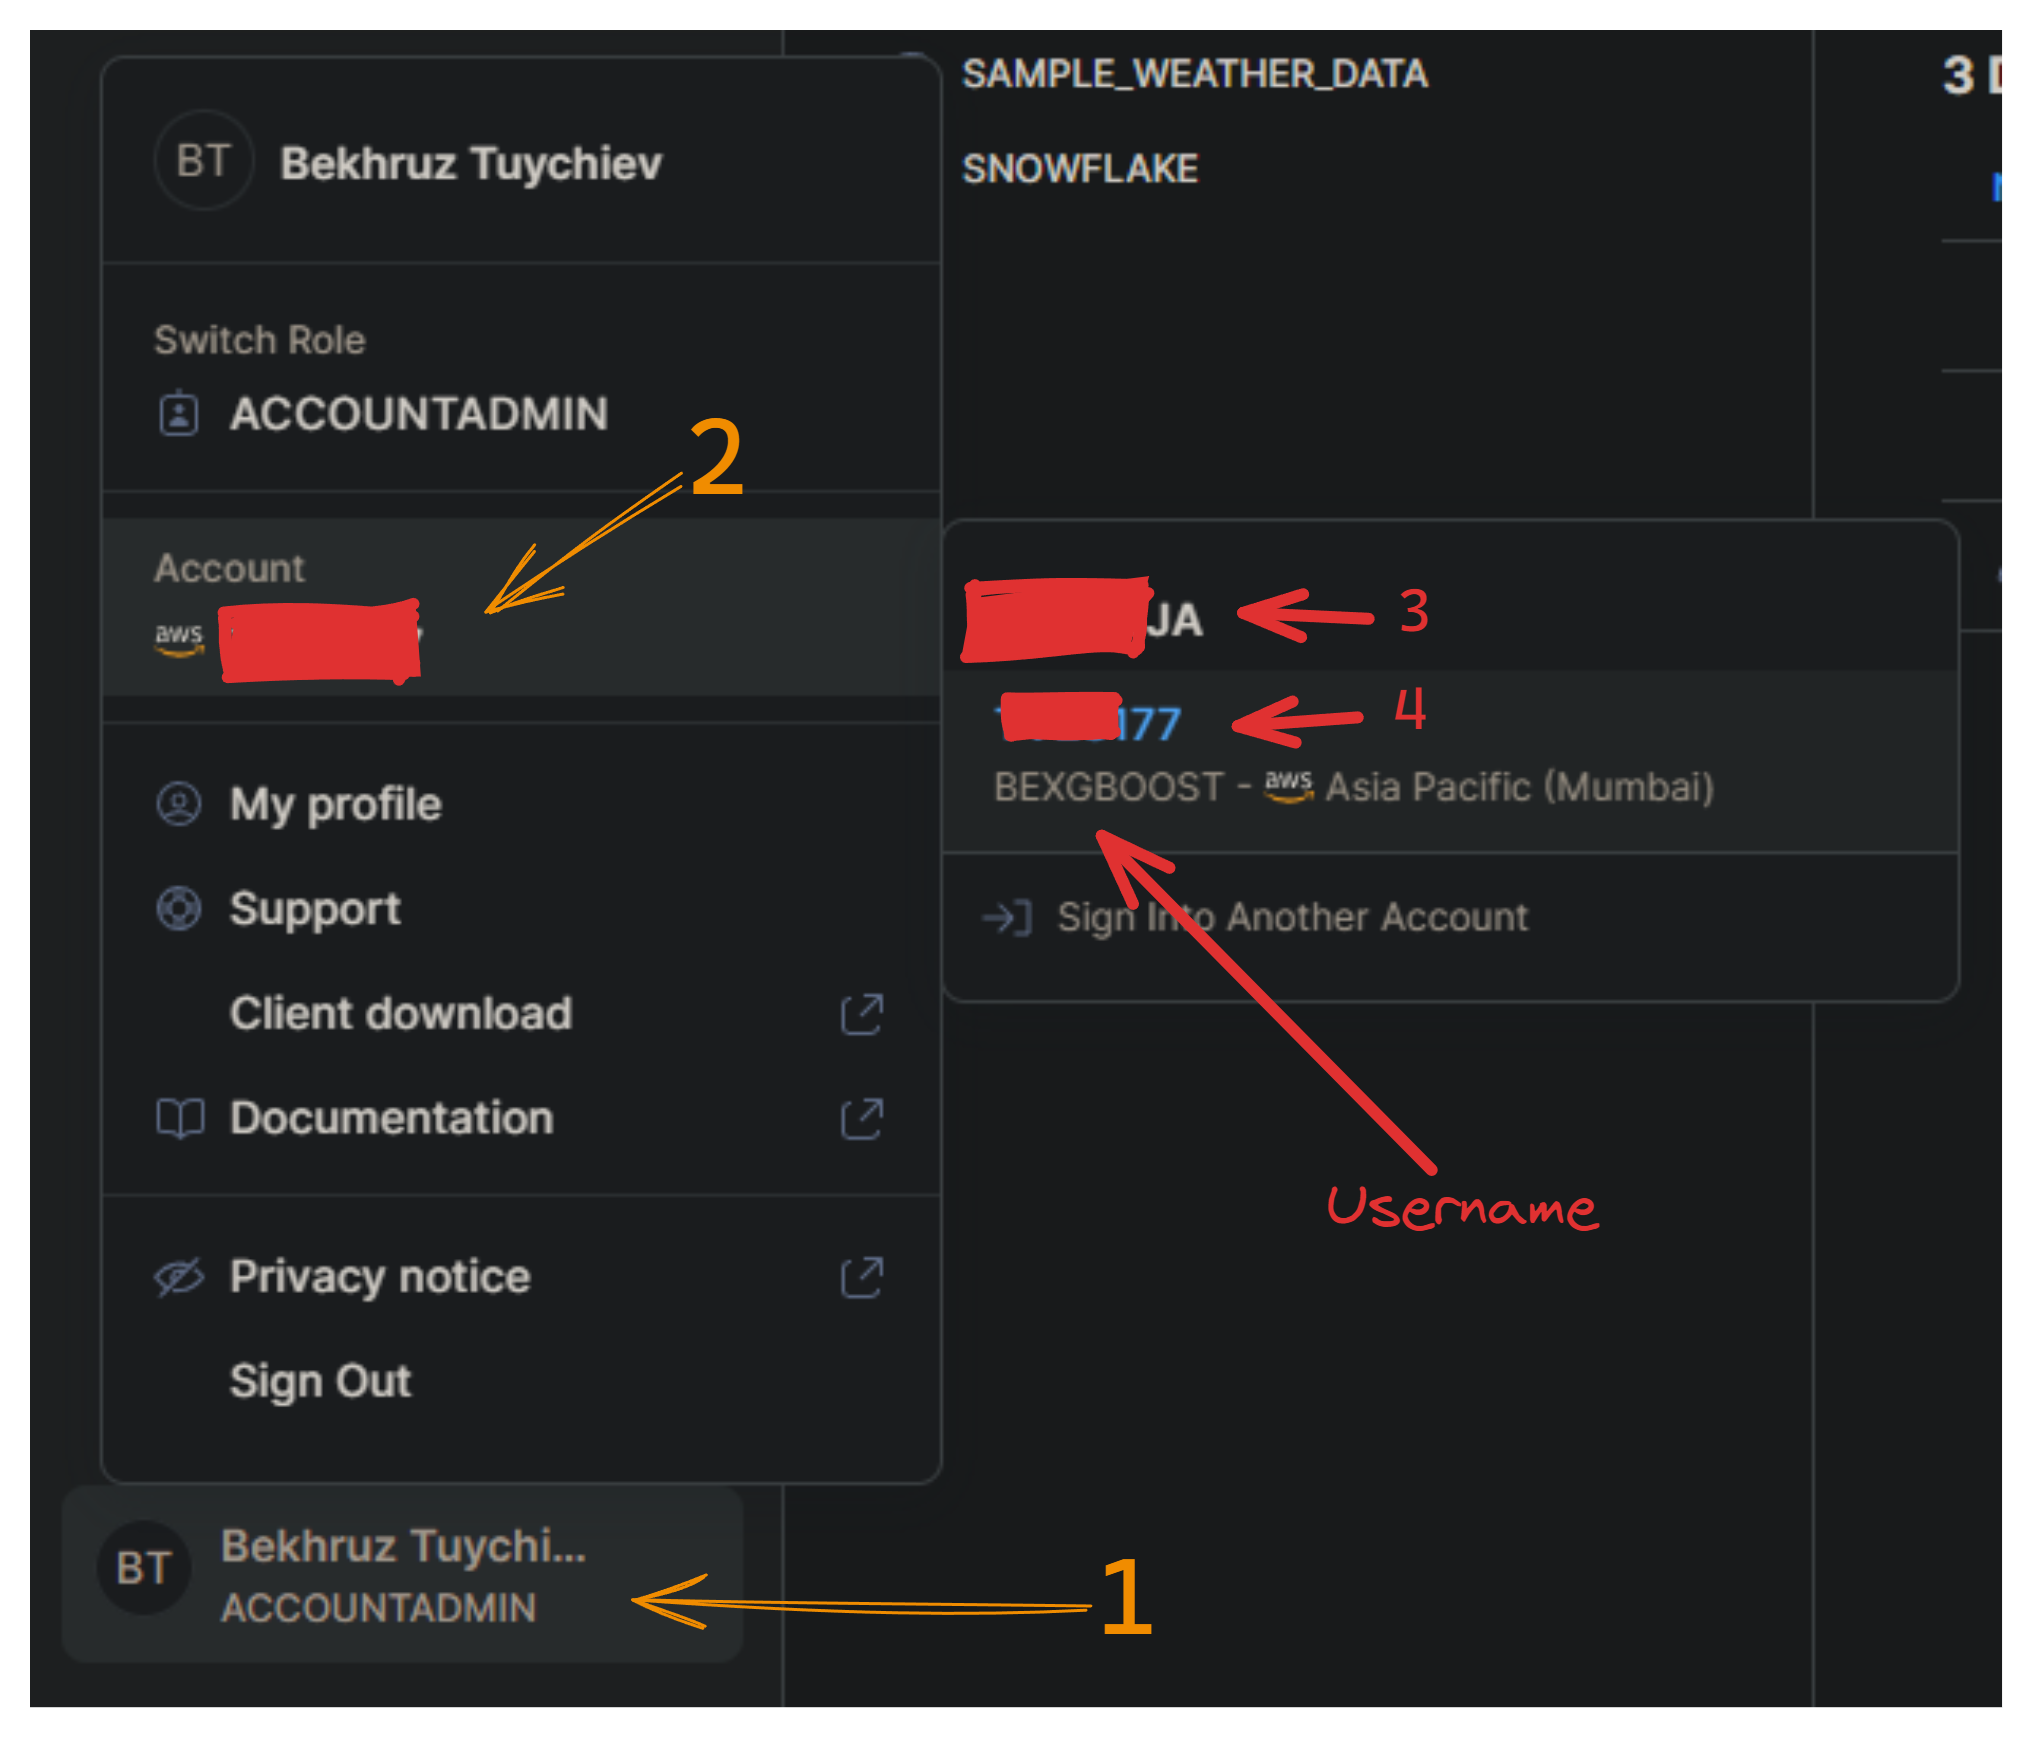

Create a separate file named `config.py` that contains a single dictionary named `credentials`:

In [115]:
credentials = (
    {
        "account": "3-4",  # Combine 3 and 4 with a hyphen
        "username": "bexgboost",  # Your username in lowercase
        "password": "your_password",  # Your Snowflake password
    },
)

We are storing credentials in a separate file for security reasons. Adding this file to `.gitignore` ensures that your Snowflake credentials won't be leaked accidentally.

Now, import the above dictionary along with the `Session` class of Snowpark:

In [116]:
from config import credentials
from snowflake.snowpark import Session

To establish a connection, you will use the `builder.configs.create()` method:

In [117]:
connection_parameters = {
    "account": credentials["account"],
    "user": credentials["username"],
    "password": credentials["password"],
}

new_session = Session.builder.configs(connection_parameters).create()
new_session.get_current_user()

'"bexgboost"'

If your username is printed, then, your first session is successfully created!

### Loading existing data into a session

The `new_session` object now has access to everything your account owns in Snowflake (and what you have permission to access). 

The first step we will do before importing data is to tell the session that we are using the `test_db` we have created in the previous section:

In [118]:
new_session.sql("USE DATABASE test_db;").collect()

[Row(status='Statement executed successfully.')]

Now, we can load the `diamonds` table of `test_db` using the `table` function of the session object:

In [119]:
diamonds_df = new_session.table("diamonds")

diamonds_df.show(5)

----------------------------------------------------------------------------------------------
|"CARAT"  |"CUT"    |"COLOR"  |"CLARITY"  |"DEPTH"  |"table"  |"PRICE"  |"X"   |"Y"   |"Z"   |
----------------------------------------------------------------------------------------------
|0.23     |Ideal    |E        |SI2        |61.5     |55.0     |326      |3.95  |3.98  |2.43  |
|0.21     |Premium  |E        |SI1        |59.8     |61.0     |326      |3.89  |3.84  |2.31  |
|0.23     |Good     |E        |VS1        |56.9     |65.0     |327      |4.05  |4.07  |2.31  |
|0.29     |Premium  |I        |VS2        |62.4     |58.0     |334      |4.20  |4.23  |2.63  |
|0.31     |Good     |J        |SI2        |63.3     |58.0     |335      |4.34  |4.35  |2.75  |
----------------------------------------------------------------------------------------------



The `show` function is the equivalent of `describe` of Pandas DataFrames and it is showing us that we have successfully connected to the table. That's right - we only connected to the diamonds table. The `diamonds_df` object doesn't hold any data as evidenced by its size:

In [120]:
import sys

sys.getsizeof(diamonds_df)

48

It is only 48 bytes when it should have been over 3 MBs. Let's spend a bit more time to understand why this is happening.

## Understanding Snowpark DataFrames

### DataFrames are lazy in Snowpark

Pandas DataFrames take up a part of your RAM, which means they live on your machine. In comparison, Snowpark DataFrames live within Snowflake's cloud platform, even though you can see their representation in your coding environment. The data itself stays on the cloud and doesn't need to be downloaded to your local machine to do operations on it. 

Another important aspect of Snowpark dataframes is that they work lazily. This means they don't actually execute any operations on the data until you specifically tell them to (like filtering or aggregating). Instead, they build a logical representation of the desired operations that are then translated into optimized SQL queries for Snowflake to execute. By comparison, Pandas executes operations immediately or in other words, Pandas performs eager execution.

Performance-wise, lazy evaluation is always significantly faster than eager execution (that's why popular blazing-fast libraries like Polars use it) and this applies to Snowpark as well. Since lazy dataframes use Snowflake's powerful elastic computing resources, they can push operations down to the database and run much quicker. 

If you are still fuzzy on lazy evaluation vs. eager execution, here is an analogy. Imagine you have a giant library full of books (your data in Snowflake). 

- Pandas DataFrames: You gather all the books you need to your desk (local machine) and  then analyze them one by one.
- Snowpark DataFrames: You stay in the library (Snowflake cloud), tell the librarian (Snowpark) which books you need and what analysis you want to perform, and the librarian retrieves and analyzes the relevant information efficiently.

### When to use Snowpark DataFrames

Snowpark actually allows you to convert data to Pandas DataFrames:

In [121]:
pandas_diamonds = diamonds_df.to_pandas()

pandas_diamonds.head()

,CARAT,CUT,COLOR,CLARITY,DEPTH,table,PRICE,X,Y,Z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


This raises the question - when to use one over the other? The answer largely depends on the size of the dataset.

If your dataset is small like the Diamonds dataset, there isn't any problem with downloading it locally and feed it to Pandas (which is what `to_pandas` method does). But with today's datasets, things can quickly get out of hand and you may have to wait hours for your GBs-in-size database to download. And remember, it is a two-way ticket - any new data you want to preserve must be sent back as well. 

That's why it makes sense to learn the Snowpark DataFrame API, which is already very similar to Pandas. If you don't want to learn it, then, there is always the `.sql` method of `Session` objects. The method allows you to execute any SQL expression compatible with Snowflake:

In [124]:
result = new_session.sql(
    """
    SELECT PRICE, CUT FROM DIAMONDS LIMIT 10
"""
)

type(result)

snowflake.snowpark.dataframe.DataFrame

In [125]:
result.show()

-----------------------
|"PRICE"  |"CUT"      |
-----------------------
|326      |Ideal      |
|326      |Premium    |
|327      |Good       |
|334      |Premium    |
|335      |Good       |
|336      |Very Good  |
|336      |Very Good  |
|337      |Very Good  |
|337      |Fair       |
|338      |Very Good  |
-----------------------



However, I do recommend mastering the DataFrame API as it comes with many system built-in functions for over 100 SQL functions and expressions.

### Snowpark DataFrame transformation functions

A huge part of your time in Snowpark will be spent using its transformation functions which are available under the following sub-module:

In [128]:
# It is a convention to import this namespace as F
import snowflake.snowpark.functions as F

All functions under `F` (which you can list by calling `dir(F)`) specifies how a dataframe should be transformed. Let's look at an initial example:

In [131]:
F.upper(F.col("CUT"))

Column(upper)

Here, the `col` function creates a reference to the given column and returns a `Column` object. Then, `upper` converts the values of the CUT column to uppercase: 

In [132]:
diamonds_df.show(5)

----------------------------------------------------------------------------------------------
|"CARAT"  |"CUT"    |"COLOR"  |"CLARITY"  |"DEPTH"  |"table"  |"PRICE"  |"X"   |"Y"   |"Z"   |
----------------------------------------------------------------------------------------------
|0.23     |Ideal    |E        |SI2        |61.5     |55.0     |326      |3.95  |3.98  |2.43  |
|0.21     |Premium  |E        |SI1        |59.8     |61.0     |326      |3.89  |3.84  |2.31  |
|0.23     |Good     |E        |VS1        |56.9     |65.0     |327      |4.05  |4.07  |2.31  |
|0.29     |Premium  |I        |VS2        |62.4     |58.0     |334      |4.20  |4.23  |2.63  |
|0.31     |Good     |J        |SI2        |63.3     |58.0     |335      |4.34  |4.35  |2.75  |
----------------------------------------------------------------------------------------------



But if we look at it, the CUT values still have lowercase letters. Why is that? Well, this `F.upper(F.col("CUT"))` expression is equivalent to the following SQL query:

```sql
SELECT UPPER(CUT);
```

What is missing here? Of course, the `FROM` clause which species the table name the transformation should be applied to (in this case, transformation is a simple SELECT statement). 

So, we must combine the `F.upper(F.col("CUT"))` expression with the `diamonds_df` object and there are three main ways to do.

- For expressions that transform or select columns, pass inside `.select()`
- For expressions that select rows, pass inside `.filter()`
- For expressions that create columns, pass inside `.with_column()`

Since our expression transforms a column, we will pass it to `.select()`:

In [134]:
our_expression = F.upper(F.col("CUT"))

diamonds_df.select(our_expression).show()

--------------------
|"UPPER(""CUT"")"  |
--------------------
|IDEAL             |
|PREMIUM           |
|GOOD              |
|PREMIUM           |
|GOOD              |
|VERY GOOD         |
|VERY GOOD         |
|VERY GOOD         |
|FAIR              |
|VERY GOOD         |
--------------------



Now, we are talking! 

Let's write another expression that filters rows:

In [142]:
diamonds_df.filter(F.col("PRICE") > 10000).count()

5222

We find that there are over 5000 diamonds in our dataset that cost over $10,000. Let's try creating a column as well:

In [147]:
(
    diamonds_df.with_column("PRICE_SQUARED", F.col("PRICE") ** 2)
    .select("PRICE", "PRICE_SQUARED")
    .show(5)
)

-----------------------------
|"PRICE"  |"PRICE_SQUARED"  |
-----------------------------
|326      |106276.0         |
|326      |106276.0         |
|327      |106929.0         |
|334      |111556.0         |
|335      |112225.0         |
-----------------------------



Above, we are showing that chaining methods are allowed as well. And we have a new column named "PRICE_SQUARED".

In summary, if you are looking for a Snowpark alternative of a Pandas function, it will either be under `F` or part of the methods of Snowpark DataFrames. You can check by calling `dir(F)` or `dir(diamonds_df)` or reading the [Snowpark Python reference](https://docs.snowflake.com/en/developer-guide/snowpark/reference/python/latest/index). 

## Performing EDA on Snowpark DataFrames

A large part of performing exploratory data analysis (EDA) is creating visuals. Lucky for us, we don't need Snowpark for this because we can keep using the modern data stack. 

Here is the idea - since EDA is all about discovering general trends and insights from data, we can often use a smaller sample instead of the entire dataset. By taking a representative sample, converting it to a Pandas DataFrame, and using good-old Matplotlib or Seaborn, we can visualize the data efficiently without downloading the whole thing. 

Let's do it:

In [60]:
sample = diamonds_df.sample(0.25).to_pandas()
sample.head()

,CARAT,CUT,COLOR,CLARITY,DEPTH,table,PRICE,X,Y,Z
0,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
1,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
2,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
3,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
4,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27


Above, we are downloading 25% of the dataset as a Pandas DataFrame. Let's convert the column names to lowercase:

In [61]:
sample.columns = [col.lower() for col in sample.columns]

sample.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Now, you can do EDA normally as you would on any dataset. Here are some possible ideas.

1. Generate a scatterplot to visualize the trend between price and carat:

Text(0.5, 1.0, 'Diamond prices vs. carat')

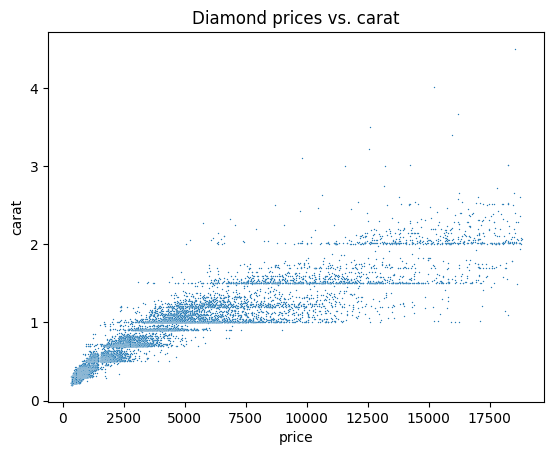

In [62]:
sns.scatterplot(data=sample, x="price", y="carat", s=1)

plt.title("Diamond prices vs. carat")

2. Plot a correlation matrix to see the correlation between every pair of numeric features:

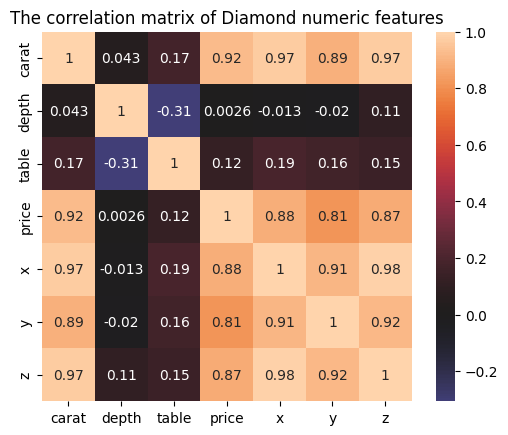

In [63]:
corr_matrix = sample.corr(numeric_only=True)

sns.heatmap(corr_matrix, center=0, square=True, annot=True)

plt.title("The correlation matrix of Diamond numeric features");

3. Plot a countplot of Diamond cut categories:

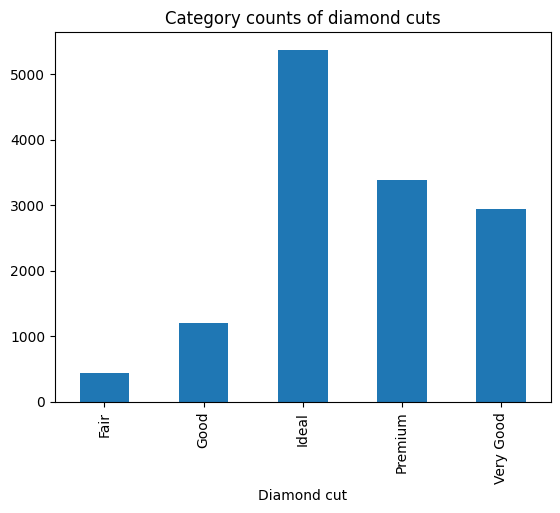

In [64]:
cut_counts = sample.groupby("cut")["cut"].count()

cut_counts.plot(kind="bar")

plt.title("Category counts of diamond cuts")
plt.xlabel("Diamond cut")

plt.show();

And just to confirm that these plots would be the same, we will run the SQL version of the above visual.

First, we will write an SQL expression to group by the diamonds dataset by `CUT`:

In [65]:
result = new_session.sql(
    """
    SELECT cut, COUNT(*) AS count
      FROM diamonds
     GROUP BY cut;
"""
)

And download the result as a Pandas DataFrame:

In [66]:
result_pd = result.to_pandas()

result_pd

,CUT,COUNT
0,Ideal,21551
1,Premium,13791
2,Good,4906
3,Very Good,12082
4,Fair,1610


This time, we will use the `plt.bar` function to visualize:

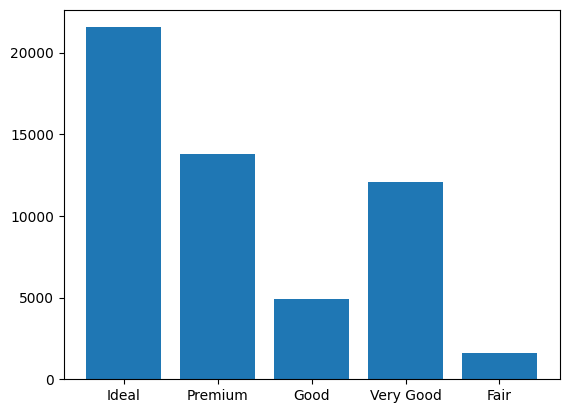

In [67]:
plt.bar(x=result_pd["CUT"], height=result_pd["COUNT"]);

The order of bars is different but looking at them sid-by-side reveals that they convey the same information. 

## Training a machine learning model in Snowpark

Finally, we are ready to learn how to train machine learning models in Snowpark. We will start by cleaning the dataset.

### Cleaning data in Snowpark

First, let's make sure all columns have the correct data type:

In [68]:
list(diamonds_df.schema)

[StructField('CARAT', DecimalType(38, 2), nullable=True),
 StructField('CUT', StringType(16777216), nullable=True),
 StructField('COLOR', StringType(16777216), nullable=True),
 StructField('CLARITY', StringType(16777216), nullable=True),
 StructField('DEPTH', DecimalType(38, 1), nullable=True),
 StructField('"table"', DecimalType(38, 1), nullable=True),
 StructField('PRICE', LongType(), nullable=True),
 StructField('X', DecimalType(38, 2), nullable=True),
 StructField('Y', DecimalType(38, 2), nullable=True),
 StructField('Z', DecimalType(38, 2), nullable=True)]

The `table` column has a weird name, so we will convert it to uppercase `TABLE_` with a trailing underscore so that it doesn't clash with a built-in SQL keyword:

In [69]:
diamonds_df = diamonds_df.with_column_renamed('"table"', "TABLE_")

diamonds_df.columns

['CARAT', 'CUT', 'COLOR', 'CLARITY', 'DEPTH', 'TABLE_', 'PRICE', 'X', 'Y', 'Z']

Now, we have to change the data type of numeric features from `DecimalType` to `DoubleType` as decimals aren't supported in Snowpark yet.

In [70]:
from snowflake.snowpark.types import DoubleType

numeric_features = ["CARAT", "X", "Y", "Z", "DEPTH", "TABLE_"]
for col in numeric_features:
    diamonds_df = diamonds_df.with_column(col, diamonds_df[col].cast(DoubleType()))

list(diamonds_df.select(*numeric_features))

[Column("CARAT"),
 Column("X"),
 Column("Y"),
 Column("Z"),
 Column("DEPTH"),
 Column("TABLE_")]

In this snippet, we are using the `with_column` function again. Another new function is `.cast()`, which is part of the methods of Snowpark dataframes. 

Also, Snowpark requires that all text features be uppercase and not have spaces between words before encoding them. Currently, the `CUT` feature violates this requirement, so we will fix it with function transformations:

In [71]:
import snowflake.snowpark.functions as F


def remove_space_and_upper(df):
    df = df.with_column("CUT", F.upper(F.replace(F.col("CUT"), " ", "_")))

    return df


diamonds_df = remove_space_and_upper(diamonds_df)

Our data is free of cleaning issues. We can now save it back as a new table to Snowflake:

In [72]:
diamonds_df.write.mode("overwrite").save_as_table("diamonds_cleaned")

Be sure to add the  `overwrite` mode as you might have to go back and change some cleaning operations and save again. 

### Preparing data for modeling in Snowpark

In this section, we will tackle any remaining pre-processing issues that might prevent models from training. Let's load the cleaned table from the previous section:

In [73]:
clean_df = new_session.table("diamonds_cleaned")

clean_df.show()

-------------------------------------------------------------------------------------------------
|"COLOR"  |"CLARITY"  |"PRICE"  |"CARAT"  |"X"   |"Y"   |"Z"   |"DEPTH"  |"TABLE_"  |"CUT"      |
-------------------------------------------------------------------------------------------------
|E        |SI2        |326      |0.23     |3.95  |3.98  |2.43  |61.5     |55.0      |IDEAL      |
|E        |SI1        |326      |0.21     |3.89  |3.84  |2.31  |59.8     |61.0      |PREMIUM    |
|E        |VS1        |327      |0.23     |4.05  |4.07  |2.31  |56.9     |65.0      |GOOD       |
|I        |VS2        |334      |0.29     |4.2   |4.23  |2.63  |62.4     |58.0      |PREMIUM    |
|J        |SI2        |335      |0.31     |4.34  |4.35  |2.75  |63.3     |58.0      |GOOD       |
|J        |VVS2       |336      |0.24     |3.94  |3.96  |2.48  |62.8     |57.0      |VERY_GOOD  |
|I        |VVS1       |336      |0.24     |3.95  |3.98  |2.47  |62.3     |57.0      |VERY_GOOD  |
|H        |SI1      

Very good!

Next, we will import the `preprocessing` and `pipeline` sub-modules from `snowflake.ml` namespace.

In [74]:
import snowflake.ml.modeling.preprocessing as snowml
from snowflake.ml.modeling.pipeline import Pipeline

While the DataFrame API of Snowpark is available under `snowflake.snowpark`, Snowpark ML modules are exposed under `snowflake.ml`. This might be confusing in the beginning but you will get used it later.

In [75]:
# List all the features for processing
cat_cols = ["CUT", "COLOR", "CLARITY"]
cat_cols_encoded = ["CUT_OE", "COLOR_OE", "CLARITY_OE"]

# We already have numeric_features

# List the correct ordering of categorical features
categories = {
    "CUT": np.array(["IDEAL", "PREMIUM", "VERY_GOOD", "GOOD", "FAIR"]),
    "CLARITY": np.array(
        ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1", "I2", "I3"]
    ),
    "COLOR": np.array(["D", "E", "F", "G", "H", "I", "J"]),
}

In the above snippet, we are listing the categorical feature names that need to be encoded. We also have to define names for output features because Snowpark adds the encoded features as new columns instead of replacing the old ones. 

We are also defining the correct order of ordinal categories. In the diamonds dataset, all categories have inherent ordering, making them more expensive as you go from left to right. 

Now, we are ready to build a pipeline which is very similar to how you do it in Scikit-learn:

In [77]:
# Build the pipeline
preprocessing_pipeline = Pipeline(
    steps=[
        (
            "OE",
            snowml.OrdinalEncoder(
                input_cols=cat_cols, output_cols=cat_cols_encoded, categories=categories
            ),
        ),
        (
            "SS",
            snowml.StandardScaler(
                input_cols=numeric_features, output_cols=numeric_features
            ),
        ),
    ]
)

The `Pipeline` class accepts a list of steps, each step being a pre-processing class. Here, we are using `OrdinalEncoder` to encode categoricals as 0, 1, 3, etc. and `StandardScaler` to normalize the numeric features. 

In the end, we will save the pipeline locally with `joblib` and test it on the entire dataset:

In [ ]:
import joblib

PIPELINE_FILE = "pipeline.joblib"

# Pickle locally first
joblib.dump(preprocessing_pipeline, PIPELINE_FILE)

transformed_diamonds_df = preprocessing_pipeline.fit(clean_df).transform(clean_df)

# transformed_diamonds_df.show()

The snippet runs without errors, so our pipeline is working, signaling that we can finally train a model.

### Training an XGBoost model in Snowpark

To train a model, we will list the feature names and target names once again:

In [41]:
# Define the columns once again
cat_cols_encoded = ["CUT_OE", "COLOR_OE", "CLARITY_OE"]
numeric_features = ["CARAT", "X", "Y", "Z", "DEPTH", "TABLE_"]

label_cols = ["PRICE"]  # Must be a list
output_cols = ["PRICE_PREDICTED"]  # A requirement in snowpark

Then, we will split the data using dataframes' `random_split` function and give weights to represent the fraction of training and testing sets:

In [35]:
# Split the data
train_df, test_df = diamonds_df.random_split(weights=[0.8, 0.2], seed=42)

Then, we will load the pipeline and fit/transform both train and test sets. 

In [40]:
# Load the pre-processing pipeline locally
pipeline = joblib.load("pipeline.joblib")

# Apply it to both dataframes
train_df_transformed = pipeline.fit(train_df).transform(train_df)
test_df_transformed = pipeline.transform(test_df)

Be sure to call only `.transform()` on the test set to avoid data leakage. 

Next, we initialize an XGBoost regressor model from `ml.modeling.xgboost` sub-module:

In [42]:
# Snowpark has models from scikit-learn and lightgbm too
from snowflake.ml.modeling.xgboost import XGBRegressor

# Initialize
regressor = XGBRegressor(
    input_cols=cat_cols_encoded + numeric_features,
    label_cols=label_cols,
    output_cols=output_cols,
)

The `XGBRegressor` class requires all input names, all target names and output column names. Afterwards, we call `.fit()` to start the training process:

In [ ]:
# Train
regressor.fit(train_df_transformed)

The training might run slowly if you have a free Snowflake account which has limited compute resources and no GPU. 

Once training finishes, we can generate predictions:

In [ ]:
# Predict
train_preds = regressor.predict(train_df_transformed)
test_preds = regressor.predict(test_df_transformed)

Let's take a look at them:

In [48]:
train_preds.select("PRICE", "PRICE_PREDICTED").show(5)

-------------------------------
|"PRICE"  |"PRICE_PREDICTED"  |
-------------------------------
|326      |431.3414916992187  |
|326      |406.4325256347656  |
|334      |427.4400634765625  |
|335      |327.6968688964844  |
|337      |319.5066223144531  |
-------------------------------



Now, we have to measure how well our initial model did. Snowpark includes dozens of metrics from scikit-learn under its `ml.modeling.metrics` module, we we import as `M`:

In [49]:
import snowflake.ml.modeling.metrics as M

Then, we run `mean_squared_error` twice to measure RMSE on both training and test sets:

In [78]:
rmse_train = M.mean_squared_error(
    df=train_preds,
    y_true_col_names=label_cols,
    y_pred_col_names=output_cols,
    squared=False,
)

rmse_test = M.mean_squared_error(
    df=test_preds,
    y_true_col_names=label_cols,
    y_pred_col_names=output_cols,
    squared=False,
)

print(f"Train RMSE score for XGBRegressor: {rmse_train:.4f}")
print(f"Train RMSE score for XGBRegressor: {rmse_test:.4f}")

Train RMSE score for XGBRegressor: 371.9664
Train RMSE score for XGBRegressor: 542.1566


Our model is off $542 on average and it might also be overfitting a bit as the difference between training and test RMSEs is large. 

Let's tune its hyperparameters to tackle these issues. 

### Hyperparameter tuning in Snowpark

Currently, Snowpark offers two hyperparameter tuning classes:

- `GridSearchCV`: exhaustive search of all hyperparameter combinations with cross-validation
- `RandomizedSearchCV`: randomized search of given hyperparameter distributions with cross-validation

XGBoost has about [a dozen hyperparameters that can improve its performance](https://www.datacamp.com/tutorial/xgboost-in-python), which necessitates that we use a randomized search. I would prefer to use Optuna which uses Bayesian search but we don't have that luxury in Snowpark yet.

Let's define the search now:

In [ ]:
%%time

from snowflake.ml.modeling.model_selection import RandomizedSearchCV

rscv = RandomizedSearchCV(
    estimator=XGBRegressor(),
    param_distributions={
        "n_estimators": [2000],
        "max_depth": list(range(3, 13)),
        "learning_rate": np.linspace(0.1, 0.5, num=10),
    },
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    input_cols=numeric_features + cat_cols_encoded,
    label_cols=label_cols,
    output_cols=output_cols,
    n_iter=10,
)

rscv.fit(train_df_transformed)

We are fixing the number of estimators to 2000 and only tuning `max_depth` and `learning_rate` parameters. The `rscv` has a default parameter of `n_iter=10`, which means the search will be performed 10 times, each time choosing a random combination of parameters. For more accurate results, it is best to choose a larger number for this parameter.

Now, let's measure the performance of the best model found. The code is the same as before but instead of `regressor`, we will use `rscv` object:

In [ ]:
# Predict
train_preds = rscv.predict(train_df_transformed)
test_preds = rscv.predict(test_df_transformed)

In [89]:
rmse_train = M.mean_squared_error(
    df=train_preds,
    y_true_col_names=label_cols,
    y_pred_col_names=output_cols,
    squared=False,
)

optimal_rmse_test = M.mean_squared_error(
    df=test_preds,
    y_true_col_names=label_cols,
    y_pred_col_names=output_cols,
    squared=False,
)

print(f"Train RMSE score for optimal model: {rmse_train:.4f}")
print(f"Test RMSE score for optimal model: {rmse_test:.4f}")

Train RMSE score for optimal model: 224.2405
Test RMSE score for optimal model: 572.0517


The training RMSE went down but the test RMSE is even larger. This dictates that we are still overfitting and we need to expand our search and include other parameters to prune the decision trees that XGBoost uses under the hood.

I will leave that part to you.

### Saving the best model in Snowpark

If we close the session now, we will lose our tuned model. To save it, we will use Snowpark's native model registry, which is a virtual storage that you can use to save any model and its metadata. 

The registry is available as `Registry` class and it requires the current session's database and schema names. It also requires that we give our project a name so that models from other projects don't get conflicted:

In [95]:
# Set up for Registry
from snowflake.ml.registry import Registry

# Get the current db and schema name
db_name = new_session.get_current_database()
schema_name = new_session.get_current_schema()

# Define global model name for the project
model_name = "diamond_prices_regression"

# Initialize a registry to log models
registry = Registry(session=new_session, database_name=db_name, schema_name=schema_name)

We will use registry's `.log_model()` method to save our models:

In [ ]:
# Get sample data to pass into registry for schema
sample = train_df.select(cat_cols_encoded + numeric_features).limit(50)

# Log the first model
v0 = registry.log_model(
    model_name=model_name,
    version_name="v0",
    model=regressor,
    sample_input_data=sample,
)

Logging a metric for the model can be done with `set_metric` (hint: you can log as many metrics as you want). We will also add a comment to describe the model:

In [ ]:
# Add the models RMSE score
v0.set_metric(metric_name="RMSE", value=rmse_test)

# Add a description
v0.comment = "The first model to predict diamond prices"

We do the same for the best model found with random search. While logging the metric, don't forget to change the value to `optimal_rmse_test`.

In [ ]:
# Log the optimal model
v1 = registry.log_model(
    model_name=model_name,
    version_name="v1",
    model=regressor,
    sample_input_data=sample,
)

# Add the models RMSE score
v1.set_metric(metric_name="RMSE", value=optimal_rmse_test)

# Add a description
v1.comment = "Optimal model found with RandomizedSearchCV"

To confirm that the models are saved, you can always call `.show_models()`:

In [ ]:
# Confirm the models are added
registry.show_models()

Learn more about how to manage the registry from [this page](https://docs.snowflake.com/en/developer-guide/snowpark-ml/snowpark-ml-mlops-model-registry) of the developer docs on Snowpark.

### Doing inference in Snowpark

Inference is usually done by choosing the best model from your registry. You can do so by filtering the result of `show_models()` or by retrieving the model directly with its version tag like below:

In [ ]:
# Doing inference with the optimal model
optimal_version = registry.get_model(model_name).version("v1")
results = optimal_version.run(test_df, function_name="predict")

results.columns

`get_model` returns a generic `model` object, which is different from `XGBRegressor`. That's why you have to call `run` by specifying the function name to perform an inference.

## Conclusion

In this tutorial, we covered an end-to-end framework to train machine learning models in Snowflake Snowpark. We started off with a bare-bones uncleaned dataset and ended up with a tuned XGBoost regressor model. We have performed all actions from data cleaning to inference on Snowflake Cloud, which means we didn't have to use system resources at all. 

We've learned how effective this type of in-database operations are when we have large datasets and that Snowflake Snowpark is one of the best tools in the market to facilitate this process. If you want to learn more about Snowpark or Snowflake in general, we recommend the following resources:

- [Snowpark API Developer Guide - a must-read](https://docs.snowflake.com/en/developer-guide/snowpark/python/index)
- [Snowpark ML Developer Guide](https://docs.snowflake.com/en/developer-guide/snowpark-ml/index)
- [Best Snowflake certification in 2024](https://www.datacamp.com/blog/best-snowflake-certification)
- [Using Time Travel feature in Snowflake](https://www.datacamp.com/tutorial/using-snowflake-time-travel-a-comprehensive-guide)
- [Getting started with data analysis in Snowflake Webinar](https://www.datacamp.com/webinars/getting-started-with-data-analysis-in-snowflake-using-python-and-sql)

Thank you for reading!